In [1]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import load_MNIST
from sklearn.preprocessing import StandardScaler
# import kmeans
from sklearn import svm
from sklearn.cluster import KMeans

利用写好的load_MNIST模块中的load_data方法导入MNIST数据集
- Parameter
    - file_name:list 
        四个文件路径
        - list[0]: 训练集的图片数据文件路径
        - list[1]: 测试集的图片数据文件路径
        - list[2]: 训练集的标签文件路径
        - list[3]: 测试集的标签文件路径
- Return
    - train_data: numpy array
    - train_labels: list
    - test_data: numpy array
    - test_labels: list

In [30]:
file = ["C:/Users/wtser/Desktop/learnData/data/Mnist/train-images.idx3-ubyte",
       "C:/Users/wtser/Desktop/learnData/data/Mnist/t10k-images.idx3-ubyte",
       "C:/Users/wtser/Desktop/learnData/data/Mnist/train-labels.idx1-ubyte",
       "C:/Users/wtser/Desktop/learnData/data/Mnist/t10k-labels.idx1-ubyte"]  

train_data,train_labels,test_data,test_labels = load_MNIST.load_data(file)
# scaler = StandardScaler()
# scaler.fit(train_data)
# train_data = scaler.transform(train_data)
# test_data = scaler.transform(test_data)
train_data_2d = train_data
test_data_2d = test_data
train_data = train_data.reshape(train_data.shape[0],28,28)
test_data = test_data.reshape(test_data.shape[0],28,28)


In [50]:
def patch_random(X,k=10):
    row = 11
    col = 11
    new_data = []
    for i in range(X.shape[0]):
        for j in range(k): 
            x = np.random.randint(0,X.shape[1]-row)
            y = np.random.randint(0,X.shape[2]-col)
            d = X[i,x:x+row,y:y+col].flatten()
            new_data.append(d)
    return np.array(new_data)

In [52]:
def patch_stride(X,stride = 5):
    col = 11
    row = 11
    
    #截块时，最大的左边界X取值epoch_x
    #截块时，最大的上边界Y取值epoch_y
    epoch_x = (int((X.shape[1]-col) / stride)+1)*stride
    epoch_y = (int((X.shape[1]-row) / stride)+1)*stride
    new_data = []
    for i in range(X.shape[0]):
        for x in range(0,epoch_x,stride):
            for y in range(0,epoch_y,stride):
                new_data.append(X[i,x:x+row,y:y+col].flatten())
    
    return np.array(new_data)

In [5]:
def assign_K_feature(data_patch,k_centers):
    new_k_feature_data = np.zeros((data_patch.shape[0],k_centers.shape[0]))
    #以后试试用train_data一起来
    for i in range(data_patch.shape[0]):
        index = np.argmin(np.sum((data_patch[i]-k_centers)**2,axis=1))
        new_k_feature_data[i][index] = 1
    return new_k_feature_data

In [19]:
def reshape_to_4KFeature(k_feature_data,count):
    new_4K_data = [] 
    _sqrt_count = int(np.sqrt(count))
    sqrt_count= int(np.sqrt(count)/2)
    print(k_feature_data.shape[0])
    for i in range(0,k_feature_data.shape[0],count):
        dic = []
        for k in range(sqrt_count):
            d = np.sum(k_feature_data[i+k*_sqrt_count:i+sqrt_count+k*_sqrt_count],axis =0)
        dic.extend(d)
        for k in range(sqrt_count):
            d = np.sum(k_feature_data[i+k*_sqrt_count+sqrt_count:i+k*_sqrt_count+2*sqrt_count],axis = 0)
        dic.extend(d)
        for k in range(sqrt_count):
            d = np.sum(k_feature_data[i+int(count/2)+k*_sqrt_count:i+int(count/2)+k*_sqrt_count+sqrt_count],axis = 0)
        dic.extend(d)
        for k in range(sqrt_count):
            d = np.sum(k_feature_data[i+int(count/2)+k*_sqrt_count+sqrt_count:i+int(count/2)+k*_sqrt_count+2*sqrt_count],axis = 0)
        dic.extend(d)
        new_4K_data.append(dic)
    return np.array(new_4K_data)

使用之前写好的kmeans聚类脚本进行聚类
Function:k_means(X,k)
- Parameters:
 - X: A numpy array of input data, shape(N,M)
 - k: interger,k class
 
- Return:
  - centers: A numpy array of shape(k,M)
  - label: A list is the label of centroids

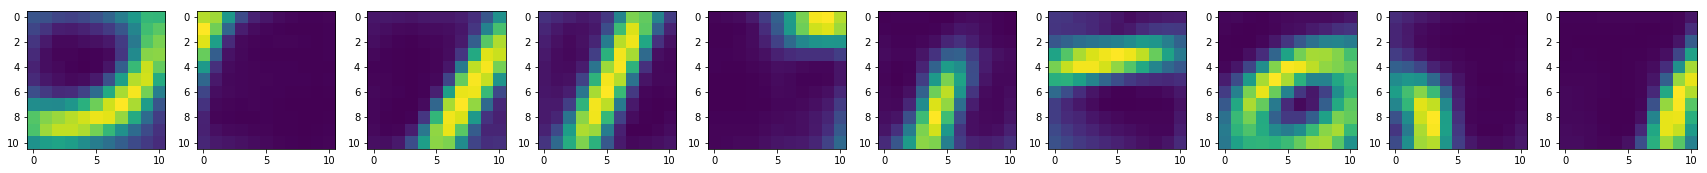

In [117]:
import matplotlib.pyplot as plt
c = k_centers[:100].reshape(100,11,11)
plt.figure(figsize=(30,30))
for i in range(10):
    plt.subplot(10,10,i+1)
    plt.imshow(c[i])
plt.show()

In [96]:
scaler = StandardScaler()
scaler.fit(k_centers_train_data_patch)
k_centers_train_data_patch = scaler.transform(k_centers_train_data_patch)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [132]:
k_centers_train_data_patch = patch_random(train_data[:1000],100)
# new_test_data = patch_random(test_data[:300],9)

In [126]:
kmeans = KMeans(n_clusters=700).fit(k_centers_train_data_patch)
k_centers = kmeans.cluster_centers_

In [330]:
# k_centers,label = kmeans.k_means(k_centers_train_data_patch,500)

E:\JupyterEnviroment\Learning\SimpleLayerCluster\kmeans.py:36: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if len(data[[assignment==i]])==0:
E:\JupyterEnviroment\Learning\SimpleLayerCluster\kmeans.py:39: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  center[i] = np.mean(data[[assignment==i]],axis=0)


In [127]:
train_data_patch = patch_stride(train_data[:1000],stride=2)
train_data_patch = StandardScaler().fit_transform(train_data_patch)
k_feature_data = assign_K_feature(train_data_patch,k_centers)
_4k_fearture_train_data = reshape_to_4KFeature(k_feature_data,(int((train_data.shape[1]-11)/2)+1)**2)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


81000


In [128]:
test_data_patch = patch_stride(test_data[:250],stride=2)
test_data_patch = StandardScaler().fit_transform(test_data_patch)
k_feature_test_data = assign_K_feature(test_data_patch,k_centers)
_4k_fearture_test_data = reshape_to_4KFeature(k_feature_test_data,(int((test_data.shape[1]-11)/2)+1)**2)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


20250


In [ ]:
svm_1 = svm.LinearSVC(max_iter=3000)
svm_1.fit(_4k_fearture_train_data,train_labels[:1000])
pre_1 = svm_1.predict(_4k_fearture_test_data[:250])
print(classification_report(pre_1,test_labels[:250]))